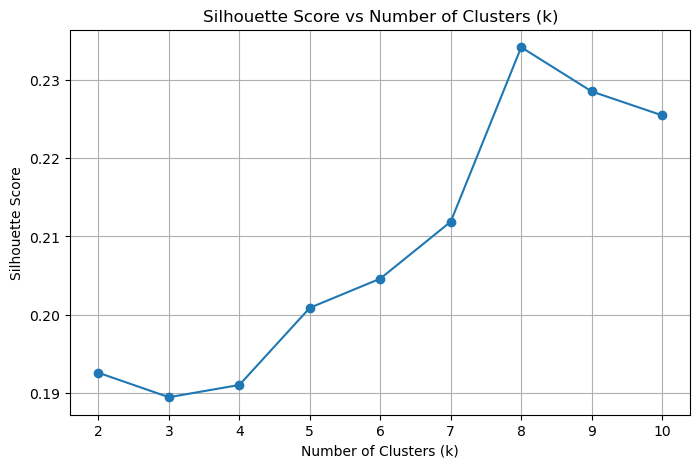

In [3]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 📂 Load your dataset
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 🎯 Select relevant numeric features
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
X = df[features]

# ⚖️ Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Try different values of k
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 📈 Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

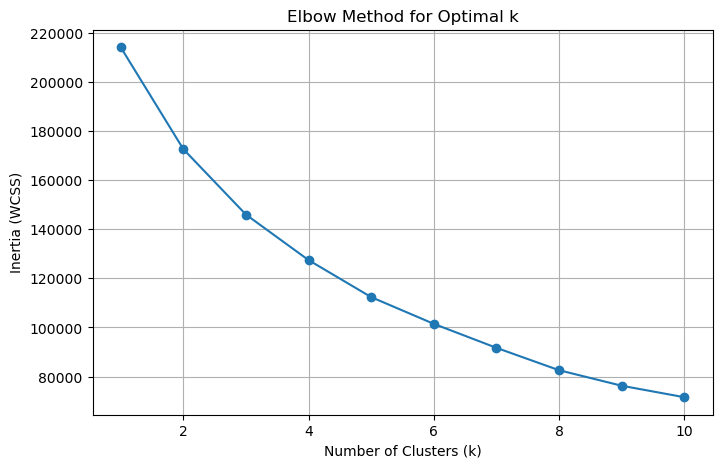

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 📂 Load your dataset
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 🎯 Select numeric features for clustering
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
X = df[features]

# ⚖️ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Try different values of k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 📈 Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 📂 Load data
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 🎯 Select features for clustering
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
X = df[features]

# ⚖️ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Cluster for k = 4, 5, and 8
for k in [4, 5, 8]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    df[f'Cluster_k{k}'] = labels  # Add column for each k

# 📊 Show mean feature values for each cluster
print("📌 Cluster Means for k=4:\n")
print(df.groupby('Cluster_k4')[features].mean())
print("\n📌 Cluster Means for k=5:\n")
print(df.groupby('Cluster_k5')[features].mean())
print("\n📌 Cluster Means for k=8:\n")
print(df.groupby('Cluster_k8')[features].mean())

📌 Cluster Means for k=4:

                  Age   Income Level  Coverage Amount  Premium Amount
Cluster_k4                                                           
0           33.599681  121729.022793    462271.731576     3151.566555
1           35.308210   52435.529483    498412.998261     3887.948065
2           45.481844   66567.815865    515044.475952     1443.018266
3           61.677748   90776.288268    493821.178044     3640.262781

📌 Cluster Means for k=5:

                  Age   Income Level  Coverage Amount  Premium Amount
Cluster_k5                                                           
0           44.961053   79841.218747    785661.550298     1780.724952
1           33.455469   50346.866588    477680.221114     3866.985217
2           44.621755   82097.210771    260623.082914     1590.676869
3           34.570554  121479.798833    471304.925351     3777.036430
4           61.904295   81235.156124    482279.999570     3868.267665

📌 Cluster Means for k=8:

          

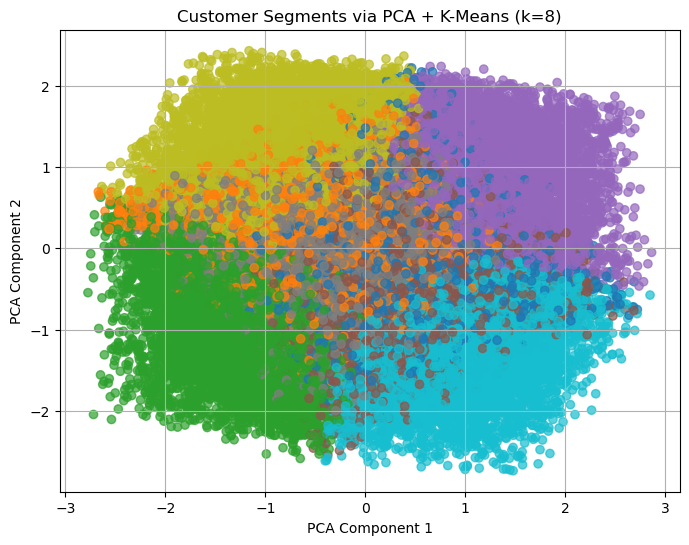

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 📂 Load the dataset
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 🎯 Select numeric features
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
X = df[features]

# ⚖️ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🌀 Run KMeans (k=8)
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 📊 Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("Customer Segments via PCA + K-Means (k=8)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()